# 基于Python语言使用DESeq2方法进行bulk-RNAseq的差异表达分析
bulk-RNAseq的差异表达分析方法，常用DESeq2和edgeR包，这2个包主要是基于R语言开发的，使用R语言进行分析

In [2]:
import pandas as pd
import numpy as np
import anndata as ad
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

## 读入count矩阵文件：

In [1]:
?pd.read_csv

Object `pd.read_csv` not found.


In [5]:
count_file = "data/test_counts.csv"
counts_df = pd.read_csv(count_file, index_col=0)
counts_df

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,...,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99,sample100
gene1,12,1,4,1,1,0,0,2,5,18,...,0,9,5,27,2,7,1,10,18,21
gene2,21,44,4,10,11,8,14,19,19,11,...,31,43,13,12,24,26,14,36,14,9
gene3,4,2,11,2,6,2,17,11,9,8,...,11,4,12,0,1,3,3,2,3,3
gene4,130,63,180,100,135,36,159,60,66,157,...,119,86,112,89,73,67,71,72,66,42
gene5,18,11,21,44,16,26,11,19,7,35,...,50,41,21,86,31,11,33,11,53,13
gene6,0,10,3,9,2,3,19,2,3,0,...,10,0,3,0,12,4,5,2,11,13
gene7,16,70,28,28,32,36,39,41,13,31,...,4,20,31,18,27,41,19,66,32,19
gene8,54,32,34,16,29,42,22,83,25,52,...,28,32,22,39,33,44,42,27,19,78
gene9,49,57,65,33,31,42,38,46,52,37,...,15,45,24,72,67,54,25,16,79,30
gene10,3,9,2,9,5,17,6,12,3,10,...,13,1,31,28,4,1,4,9,11,5


In [6]:
counts_df = counts_df.T
counts_df.head().iloc[:,range(10)]

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sample1,12,21,4,130,18,0,16,54,49,3
sample2,1,44,2,63,11,10,70,32,57,9
sample3,4,4,11,180,21,3,28,34,65,2
sample4,1,10,2,100,44,9,28,16,33,9
sample5,1,11,6,135,16,2,32,29,31,5


注意：读入的数据进行转置，是因为使用pydeseq2包进行分析时，count矩阵需要的是行为样本，列为基因名称，和R语言中的DESeq2包刚好相反。

读入样本信息文件：

In [8]:
condition_file = "data/test_metadata.csv"
condition_df = pd.read_csv(condition_file, index_col=0)
condition_df.head()

,condition,group
sample1,A,X
sample2,A,Y
sample3,A,X
sample4,A,Y
sample5,A,X


构建DeseqDataSet 对象，并进行差异分析：

In [11]:
# 构建DeseqDataSet 对象
dds = DeseqDataSet(counts = counts_df, 
                   metadata = condition_df, 
                   design_factors = "group")
# 离散度和log fold-change评估.
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Refitting 0 outliers.



执行统计检验：

In [12]:
# 执行统计分析并返回结果
res = DeseqStats(dds)
res.summary()

Log2 fold change & Wald test p-value: group Y vs X


Running Wald tests...
... done in 0.01 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene1,8.541317,0.663407,0.288831,2.296872,0.021626,0.054065
gene2,21.281239,0.129092,0.157676,0.818722,0.412945,0.434855
gene3,5.010123,-0.836869,0.291976,-2.866227,0.004154,0.013847
gene4,100.517961,-0.546987,0.113573,-4.816164,0.000001,0.000015
gene5,27.142450,0.266872,0.161699,1.650429,0.098855,0.141222
gene6,5.413043,-0.507724,0.306881,-1.654465,0.098033,0.141222
gene7,28.294023,0.153418,0.149872,1.023658,0.305997,0.382496
gene8,40.358344,0.390205,0.133890,2.914368,0.003564,0.013847
gene9,37.166183,0.104873,0.134295,0.780910,0.434855,0.434855
gene10,11.589325,0.433998,0.244339,1.776213,0.075698,0.141222


提取结果：

In [13]:
res_df = res.results_df
res_df


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene1,8.541317,0.663407,0.288831,2.296872,0.021626,0.054065
gene2,21.281239,0.129092,0.157676,0.818722,0.412945,0.434855
gene3,5.010123,-0.836869,0.291976,-2.866227,0.004154,0.013847
gene4,100.517961,-0.546987,0.113573,-4.816164,0.000001,0.000015
gene5,27.142450,0.266872,0.161699,1.650429,0.098855,0.141222
gene6,5.413043,-0.507724,0.306881,-1.654465,0.098033,0.141222
gene7,28.294023,0.153418,0.149872,1.023658,0.305997,0.382496
gene8,40.358344,0.390205,0.133890,2.914368,0.003564,0.013847
gene9,37.166183,0.104873,0.134295,0.780910,0.434855,0.434855
gene10,11.589325,0.433998,0.244339,1.776213,0.075698,0.141222


筛选显著性差异表达的基因：

In [14]:
# 对padj取-log10对数
res_df['-logpadj'] = -res_df.padj.apply(math.log10)
res_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-logpadj
gene1,8.541317,0.663407,0.288831,2.296872,0.021626,0.054065,1.267082
gene2,21.281239,0.129092,0.157676,0.818722,0.412945,0.434855,0.361655
gene3,5.010123,-0.836869,0.291976,-2.866227,0.004154,0.013847,1.858658
gene4,100.517961,-0.546987,0.113573,-4.816164,0.000001,0.000015,4.834624
gene5,27.142450,0.266872,0.161699,1.650429,0.098855,0.141222,0.850098
gene6,5.413043,-0.507724,0.306881,-1.654465,0.098033,0.141222,0.850098
gene7,28.294023,0.153418,0.149872,1.023658,0.305997,0.382496,0.417373
gene8,40.358344,0.390205,0.133890,2.914368,0.003564,0.013847,1.858658
gene9,37.166183,0.104873,0.134295,0.780910,0.434855,0.434855,0.361655
gene10,11.589325,0.433998,0.244339,1.776213,0.075698,0.141222,0.850098


In [15]:
# 尝试写循环筛选上下调基因分类赋值给 "up" 和 "down" 和 "nosig" 加入pvalue条件
###loc函数：通过行索引 "Index" 中的具体值来取行数据（如取"Index"为"A"的行）
res_df.loc[(res_df.log2FoldChange>2)&(res_df.padj<0.05),'type']='up'
res_df.loc[(res_df.log2FoldChange<-2)&(res_df.padj<0.05),'type']='down'
res_df.loc[(abs(res_df.log2FoldChange)<=2)|(res_df.padj>=0.05),'type']='nosig'
res_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-logpadj,type
gene1,8.541317,0.663407,0.288831,2.296872,0.021626,0.054065,1.267082,nosig
gene2,21.281239,0.129092,0.157676,0.818722,0.412945,0.434855,0.361655,nosig
gene3,5.010123,-0.836869,0.291976,-2.866227,0.004154,0.013847,1.858658,nosig
gene4,100.517961,-0.546987,0.113573,-4.816164,0.000001,0.000015,4.834624,nosig
gene5,27.142450,0.266872,0.161699,1.650429,0.098855,0.141222,0.850098,nosig
gene6,5.413043,-0.507724,0.306881,-1.654465,0.098033,0.141222,0.850098,nosig
gene7,28.294023,0.153418,0.149872,1.023658,0.305997,0.382496,0.417373,nosig
gene8,40.358344,0.390205,0.133890,2.914368,0.003564,0.013847,1.858658,nosig
gene9,37.166183,0.104873,0.134295,0.780910,0.434855,0.434855,0.361655,nosig
gene10,11.589325,0.433998,0.244339,1.776213,0.075698,0.141222,0.850098,nosig


In [16]:
res_df.type.value_counts()

nosig    10
Name: type, dtype: int64

火山图可视化

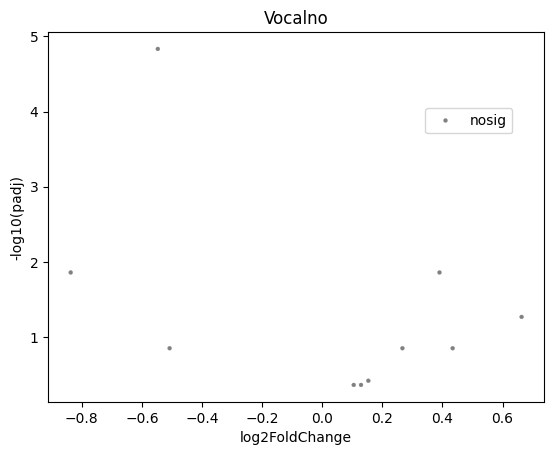

In [17]:
# 先设置一下颜色
colors = ["#808080","#DC143C","#00008B"]
sns.set_palette(sns.color_palette(colors))
# 绘图
ax=sns.scatterplot(x='log2FoldChange', y='-logpadj',data = res_df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=8,#点大小
                )
# 标签
ax.set_title("Vocalno")
ax.set_xlabel("log2FoldChange")
ax.set_ylabel("-log10(padj)")
#移动图例位置
ax.legend(loc='center right', bbox_to_anchor=(0.95,0.76), ncol=1)

In [ ]:
res_df.to_csv("python_deseq2.csv")